In [ ]:
import matplotlib.pyplot as plt
input_values = [1, 2, 3, 4, 5] 
squares = [1, 4, 9, 16, 25]
#linewidth 线宽度
plt.plot(input_values,squares,linewidth=5)
# 设置图表标题，并给坐标轴加上标签
plt.title("Square Numbers",fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of Value",fontsize=14)
# 设置刻度标记的大小
plt.tick_params(axis='both',labelsize=14)
plt.show() 

In [ ]:
import matplotlib.pyplot as plt
#s是大小
x_values = list(range(1, 1001))
y_values = [x**2 for x in x_values] 
plt.scatter(x_values, y_values,c='yellow',edgecolor='none', s=40)
#根据y点的值设置颜色
# plt.scatter(x_values, y_values,c=y_values, cmap=plt.cm.Blues,edgecolor='none', s=40)
plt.axis([0, 1000, 0, 1000000]) 

#自动保存图标  名称 / 是否留有空白区域
# plt.savefig('squares_plot.png', bbox_inches='tight')
plt.show() 

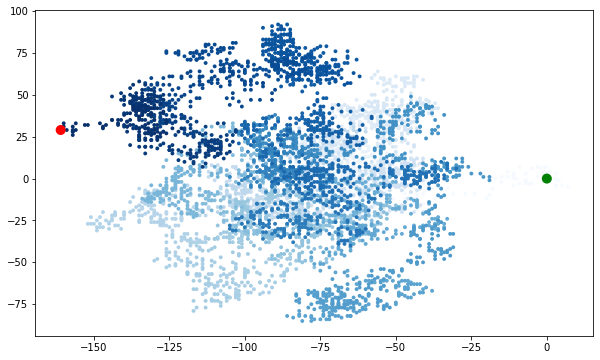

In [6]:
from random import choice
import matplotlib.pyplot as plt 
class RandomWalk():
    """一个生成随机漫步数据的类"""
    def __init__(self, num_points=5000):
        """初始化随机漫步的属性"""
        self.num_points = num_points
        # 所有随机漫步都始于(0, 0)
        self.x_values = [0]
        self.y_values = [0] 
    def fill_walk(self):
        """计算随机漫步包含的所有点"""
        # 不断漫步，直到列表达到指定的长度
        while len(self.x_values) < self.num_points:
            # 决定前进方向以及沿这个方向前进的距离
            x_direction = choice([1, -1])
            x_distance = choice([0, 1, 2, 3, 4])
            x_step = x_direction * x_distance

            y_direction = choice([1, -1])
            y_distance = choice([0, 1, 2, 3, 4])
            y_step = y_direction * y_distance

            # 拒绝原地踏步
            if x_step == 0 and y_step == 0:
                continue

            # 计算下一个点的x和y值
            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step

            self.x_values.append(next_x)
            self.y_values.append(next_y) 

rw = RandomWalk(5000)
rw.fill_walk()
point_numbers = list(range(rw.num_points))
# 设置绘图窗口的尺寸
plt.figure(figsize=(10, 6))
plt.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues,
edgecolor='none', s=15) 
# 突出起点和终点
plt.scatter(0, 0, c='green', edgecolors='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none',
s=100) 
# 隐藏坐标轴
# plt.axes().get_xaxis().set_visible(True)
# plt.axes().get_yaxis().set_visible(True)
plt.show()

In [7]:
from random import randint
import pygal
class Die():

    def __init__(self, num_sides=6):
        """骰子默认为6面"""
        self.num_sides = num_sides

    def roll(self):
        return randint(1, self.num_sides)

die = Die()
# 掷几次骰子，并将结果存储在一个列表中
results = []
for roll_num in range(100):
    result = die.roll()
    results.append(result)
frequencies = []
for value in range(1, die.num_sides+1):
    frequency = results.count(value)
    frequencies.append(frequency) 
print(frequencies) 
# 对结果进行可视化
hist = pygal.Bar()
hist.title = "Results of rolling one D6 1000 times."
hist.x_labels = ['1', '2', '3', '4', '5', '6']
hist.x_title = "Result"
hist.y_title = "Frequency of Result"
hist.add('D6', frequencies)
hist.render_to_file('die_visual.svg')

[18, 14, 19, 19, 17, 13]


In [8]:
from random import randint
import pygal

die_1 = Die()
die_2 = Die()
# 掷几次骰子，并将结果存储在一个列表中
results = []
for roll_num in range(5000):
    result = die_1.roll()+die_2.roll();
    results.append(result)
max_result = die_1.num_sides + die_2.num_sides
frequencies = []
for value in range(2, max_result+1):
    frequency = results.count(value)
    frequencies.append(frequency) 
print(frequencies) 
# 对结果进行可视化
hist = pygal.Bar()
hist.title = "Results of rolling one D6 1000 times."
hist.x_labels = ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
hist.x_title = "Result"
hist.y_title = "Frequency of Result"
hist.add('D6', frequencies)
#保存图片
hist.render_to_file('die_visual.svg')

[142, 315, 399, 536, 663, 842, 658, 564, 428, 309, 144]
